In [16]:
import csv
from IPython.display import display, Math, Latex
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as pl

reader = csv.reader(open('fires_thefts.csv'), delimiter=',')

fires = list()
thefts = list()
for xi, yi in reader:
    fires.append(float(xi))
    thefts.append(float(yi)) 
    
print('fires = {}'.format(fires[:10])) 
print('thefts = {}'.format(thefts[:10]))

fires = [6.2, 9.5, 10.5, 7.7, 8.6, 34.1, 11.0, 6.9, 7.3, 15.1]
thefts = [29.0, 44.0, 36.0, 37.0, 53.0, 68.0, 75.0, 18.0, 31.0, 25.0]


In [17]:
theta = [0,0]

def hypothesis(theta, X):
    return theta[0] + theta[1]*X

def J(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))

def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),   
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break      
        if abs(prev_cost - current_cost) <= eps:
            break     
        log.append([current_cost, theta])
    return theta, log

best_theta, log = gradient_descent(hypothesis, J, [0.0, 0.0], fires, thefts, alpha=0.001, eps=0.001)

def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\\\ "
    ltx += r'\end{array}\right]'
    return ltx

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(best_theta).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % log[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(log))) 

<IPython.core.display.Math object>

In [18]:
example_x = 50
predicted_y = hypothesis(best_theta, example_x)
print(predicted_y)

86.87183634770264


In [19]:
example_x = 100
predicted_y = hypothesis(best_theta, example_x)
print(predicted_y)

159.51685404647884


In [20]:
example_x = 200
predicted_y = hypothesis(best_theta, example_x)
print(predicted_y)

304.80688944403124


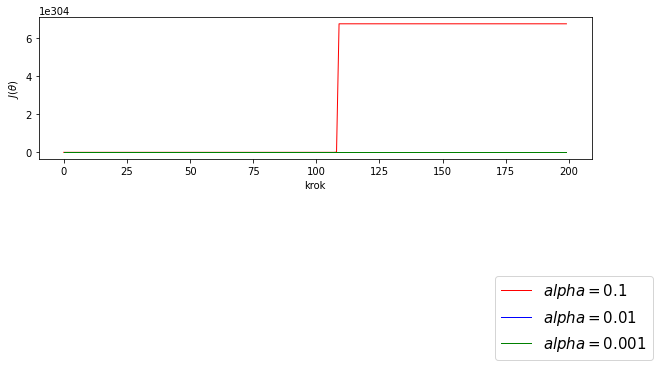

In [21]:
def costchangeplot(logs1, logs2, logs3):
    fig = pl.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(2,1,1)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel('krok')
    ax.set_ylabel(r'$J(\theta)$')

    X = np.arange(0, 200, 1)
    logs1 = logs1 + [logs1[-1]]*90
    Y1 = [logs1[step][0] for step in X]
    ax.plot(X, Y1, color="red", linewidth='1', label=(r'$alpha = 0.1$'))
    Y2 = [logs2[step][0] for step in X]
    ax.plot(X, Y2, color="blue", linewidth='1', label=(r'$alpha = 0.01$'))
    Y3 = [logs3[step][0] for step in X]
    ax.plot(X, Y3, color="green", linewidth='1', label=(r'$alpha = 0.001$'))
    return fig

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass

def slide():
    best_theta1, log1 = gradient_descent(hypothesis, J, [0.0, 0.0], fires, thefts, alpha=0.1, eps=0.001)
    best_theta2, log2 = gradient_descent(hypothesis, J, [0.0, 0.0], fires, thefts, alpha=0.01, eps=0.001)
    best_theta3, log3 = gradient_descent(hypothesis, J, [0.0, 0.0], fires, thefts, alpha=0.001, eps=0.001)
    fig = costchangeplot(log1, log2, log3)
    legend(fig)

slide()